## Loan Prediction Data Set

Dataset - The dataset has been taken from Kaggle name of Loan Prediction Dataset

Attributes -  Loan_ID , Gender, Married , Dependents, Education , Self_Employed, ApplicantIncome,CoapplicantIncome,Loan Amount,Loan_Amount_Term Credit_History Property_Area Loan_Status

Problem Statement - We have to predict whether a loan is approved or not based on the customer's profile using key features such as applicant income, credit history, etc.

Problem Type - Classification ( Response Varible ( Loan Status ) Are Categorical ) Approach Used

1- Exploratory data analysis 

2- Data preprocessing  a) Scaling c) Missing values  d) Train and test split

3- Modelling a) Logistic Refression  b) SVM  c) Decision Tree d) Random Forest Classification

4- Optimization (Model improvement) Techniques used- Hyperparameter Tunning




## 1- Importing Libraries

In [2]:
# Loading Required Libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

## 2- Importing Dataset

In [3]:
# Loading Dataset

data =pd.read_csv("C:\\Users\\RAM\\Desktop\\Dataset\\loan.csv")







In [4]:
#Visualizing Loan Prediction dataset in dataframe format
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#Rows and Columns of the dataset
data.shape

(614, 13)

In [6]:
## we will see type of our dataset 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## 3- Data Pre-processing And Exploratry Data Analysis

In [7]:
# We will check Null value of our dataset 

data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# we will see the Missing value present in our dataset in the form of percentage

data.isnull().sum()*100/len(data)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

## 4- Handling missing Values 


In [9]:
data = data.drop('Loan_ID',axis=1)

In [10]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
data['Gender'].mode()[0]


'Male'

In [12]:
data['Gender'] =data['Gender'].fillna(data['Gender'].mode()[0])

In [13]:
data['Married'].mode()[0]

'Yes'

In [14]:
data['Married'] =data['Married'].fillna(data['Married'].mode()[0])

In [15]:
data['Dependents'].mode()[0]

'0'

In [16]:
data['Dependents'] =data['Dependents'].fillna(data['Dependents'].mode()[0])

In [17]:
data['LoanAmount'].mode()[0]

120.0

In [18]:
data['LoanAmount'] =data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])

In [19]:
data['Loan_Amount_Term'].mode()[0]

360.0

In [20]:
data['Loan_Amount_Term'] =data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])

In [21]:
data['Self_Employed'].mode()[0]

'No'

In [22]:
data['Self_Employed'] =data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [23]:
data['Credit_History'].mode()[0]

1.0

In [24]:
data['Credit_History'] =data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [25]:
data.isnull().sum()*100/len(data)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [26]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [27]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [28]:
data['Credit_History'].unique()

array([1., 0.])

In [29]:
data.isnull().sum()*100/len(data)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

# 5- Handling Categorical Columns

In [30]:
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
79,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,1.0,Semiurban,Y
560,Male,Yes,2,Not Graduate,No,3675,242.0,108.0,360.0,1.0,Semiurban,Y
302,Female,No,0,Graduate,No,5000,0.0,132.0,360.0,1.0,Rural,Y
387,Male,Yes,0,Not Graduate,No,3010,3136.0,120.0,360.0,0.0,Urban,N


In [31]:
data['Dependents'] =data['Dependents'].replace(to_replace="3+",value='4')

In [32]:
data['Dependents'].unique()

array(['0', '1', '2', '4'], dtype=object)

In [33]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [34]:
data['Gender'] = data['Gender'].map({'Male':1,'Female':0}).astype('int')
data['Married'] = data['Married'].map({'Yes':1,'No':0}).astype('int')
data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
data['Property_Area'] = data['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')
data['Loan_Status'] = data['Loan_Status'].map({'Y':1,'N':0}).astype('int')

In [35]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1


# 6- Descriptive statistics


In [36]:
data.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.781759,0.133550,5403.459283,1621.245798,145.465798,342.410423,0.855049,1.087948,0.687296
std,0.386497,0.476373,0.413389,0.340446,6109.041673,2926.248369,84.180967,64.428629,0.352339,0.815081,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

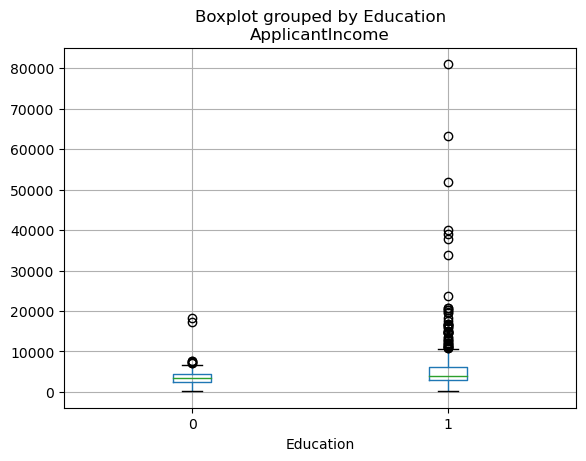

In [37]:
## with the help of box plot we will check the applicant income by education .
data.boxplot(column='ApplicantIncome',by='Education')

## 7-Heatmap


C:\Users\RAM\AppData\Local\Temp\ipykernel_1048\3098421763.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


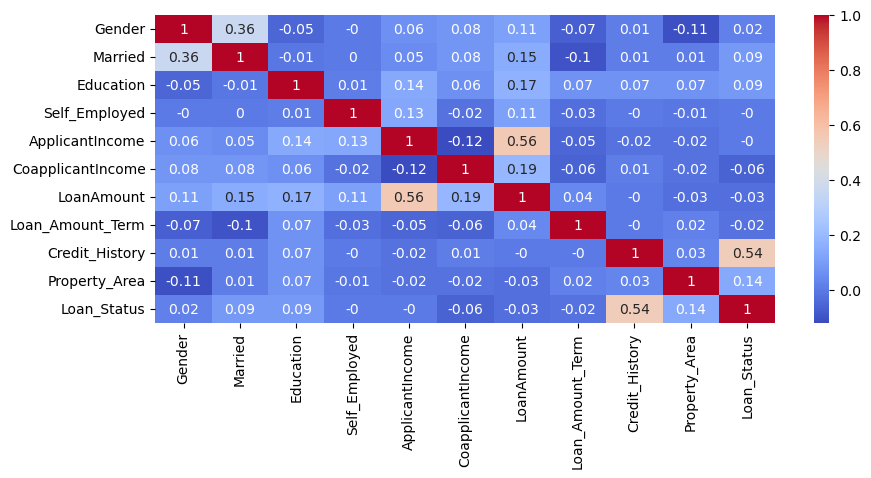

In [38]:
# Heatmap showing correlation between different attributes
f, ax = plt.subplots(figsize=(10, 4))
corr = data.corr()
hm = sns.heatmap(round(corr, 2), ax=ax, annot=True, cmap='coolwarm')

plt.show()


 ## Output 
    
With the help of the heatmap above, we can clearly see a strong correlation between the Loan Amount and Applicant Income, as well as between Loan Status and Credit History.

## 8- Setting independent(x) and response variables(y)

In [39]:
X = data.drop('Loan_Status',axis=1)

In [40]:
y = data['Loan_Status']

In [41]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

## 9- Feature Scaling

In [42]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1


In [43]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [44]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[cols]=st.fit_transform(X[cols])

In [45]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,0.072991,-0.554487,-0.302759,0.273231,1.0,1
1,1,1,1,1,0,-0.134412,-0.038732,-0.207648,0.273231,1.0,0
2,1,1,0,1,1,-0.393747,-0.554487,-0.944757,0.273231,1.0,1
3,1,1,0,0,0,-0.462062,0.251980,-0.302759,0.273231,1.0,1
4,1,0,0,1,0,0.097728,-0.554487,-0.053093,0.273231,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.410130,-0.554487,-0.885313,0.273231,1.0,0
610,1,1,4,1,0,-0.212557,-0.554487,-1.253868,-2.522836,1.0,0
611,1,1,1,1,0,0.437174,-0.472404,1.278459,0.273231,1.0,1
612,1,1,2,1,0,0.357064,-0.554487,0.493794,0.273231,1.0,1


## 10 -Train-test split And Applying K- Fold Cross Validation.

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [47]:
model_df={}
def model_val(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")
    
    score = cross_val_score(model,X,y,cv=5)
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)

In [76]:
## we will save our accuracy score in our model 
model_df

{LogisticRegression(): 80.62,
 SVC(): 80.13,
 DecisionTreeClassifier(): 71.34,
 RandomForestClassifier(): 78.01,
 GradientBoostingClassifier(): 77.53}

## 11- Logistic Regression Implementation

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,y)

LogisticRegression() accuracy is 0.7886178861788617
LogisticRegression() Avg cross val score is 0.8061975209916034


## 12 - Support Vector Classifier

In [50]:
from sklearn import svm
model = svm.SVC()
model_val(model,X,y)

SVC() accuracy is 0.7804878048780488
SVC() Avg cross val score is 0.8013061442089832


## 13- Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,y)

DecisionTreeClassifier() accuracy is 0.6991869918699187
DecisionTreeClassifier() Avg cross val score is 0.7133946421431427


## 14- Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
model_val(model,X,y)

RandomForestClassifier() accuracy is 0.7804878048780488
RandomForestClassifier() Avg cross val score is 0.7801412768226043


## 15 - Gradient Boosting Classifier

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
model =GradientBoostingClassifier()
model_val(model,X,y)

GradientBoostingClassifier() accuracy is 0.7479674796747967
GradientBoostingClassifier() Avg cross val score is 0.7752765560442489


## 16 - Hyperparameter Tunning 

In [54]:
from sklearn.model_selection import RandomizedSearchCV

## Logistic Regtression 

In [55]:
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":['liblinear']}

In [56]:
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                   param_distributions=log_reg_grid,
                  n_iter=20,cv=5,verbose=True)

In [57]:
rs_log_reg.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [58]:
rs_log_reg.best_score_

0.809462881514061

In [59]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

## Support Vector Classifier

In [60]:
svc_grid = {'C':[0.25,0.50,0.75,1],"kernel":["linear"]}

In [61]:
rs_svc=RandomizedSearchCV(svm.SVC(),
                  param_distributions=svc_grid,
                   cv=5,
                   n_iter=20,
                  verbose=True)

In [62]:
rs_svc.fit(X,y)

C:\Users\RAM\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['linear']},
                   verbose=True)

In [63]:
rs_svc.best_score_

0.809462881514061

In [64]:
rs_svc.best_params_

{'kernel': 'linear', 'C': 0.25}

## Random Forest Classifier

In [65]:
RandomForestClassifier()

RandomForestClassifier()

In [72]:
rf_grid={'n_estimators':np.arange(10,1000,10),
  'max_features':['auto','sqrt'],
 'max_depth':[None,3,5,10,20,30],
 'min_samples_split':[2,5,20,50,100],
 'min_samples_leaf':[1,2,5,10]
 }

In [73]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                  param_distributions=rf_grid,
                   cv=5,
                   n_iter=20,
                  verbose=True)

In [74]:
rs_rf.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\RAM\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
55 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\RAM\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RAM\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\RAM\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_param

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [69]:
rs_rf.best_score_

0.8110888977742237

In [70]:
rs_rf.best_params_

{'n_estimators': 70,
 'min_samples_split': 50,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5}

In [ ]:
## LogisticRegression score Before Hyperparameter Tuning: 80.48
##LogisticRegression score after Hyperparameter Tuning: 80.48 
    
------------------------------------------------------
## SVC score Before Hyperparameter Tuning: 79.38
## SVC score after Hyperparameter Tuning: 80.66
    
--------------------------------------------------------
## RandomForestClassifier score Before Hyperparameter Tuning: 77.76
## RandomForestClassifier score after Hyperparameter Tuning: 80.66

## 17 - Save the Model 

In [ ]:
X = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

In [ ]:
rf = RandomForestClassifier(n_estimators=270,
 min_samples_split=5,
 min_samples_leaf=5,
 max_features='sqrt',
 max_depth=5)

In [ ]:
rf.fit(X,y)

In [ ]:
import joblib

In [ ]:
joblib.dump(rf,'loan_status_predict')

In [ ]:
model = joblib.load('loan_status_predict')

In [ ]:
import pandas as pd
df = pd.DataFrame({
    'Gender':1,
    'Married':1,
    'Dependents':2,
    'Education':0,
    'Self_Employed':0,
    'ApplicantIncome':2889,
    'CoapplicantIncome':0.0,
    'LoanAmount':45,
    'Loan_Amount_Term':180,
    'Credit_History':0,
    'Property_Area':1
},index=[0])

In [ ]:
df

In [ ]:
result = model.predict(df)

In [ ]:
if result==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")